In [1]:
# Training the model and test it 
#    Objectif: building a performed model wiith random forest algorithm using all the previous work 
#    Input: 
#     preprocessed data without PCA and best parameters:
#        x_train.csv 
#        y_train.csv 
#        x_test.csv 
#        y_test.csv 
#    preprocessed data with PCA and best parameters:
#        x_pca_train.csv 
#        y_pca_train.csv 
#   
#   Output:
#    builded model 

#    Author: SOUAD BOUTANE 


In [2]:

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import warnings


#Split data
from sklearn.model_selection import train_test_split

#Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

#Test confusion matrix
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, roc_curve, auc

#tuning parameters
from sklearn.model_selection import RandomizedSearchCV

#subplot
from pylab import *

#warning ignore
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

#Accuracy
from sklearn.metrics import precision_recall_fscore_support


C:\Users\souad\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
######################################   LOAD unbalanced PCA DATA:   ################################

X_train_pca = np.genfromtxt('../../../data/pca/x_pca_train.csv', delimiter=',')
X_test_pca = np.genfromtxt('../../../data/pca/x_pca_test.csv', delimiter=',')
Y_train=np.genfromtxt('../../../data/y_train.csv', delimiter=',')
Y_test=np.genfromtxt('../../../data/y_test.csv', delimiter=',')


In [5]:
####################################    BUILDING MODEL     ################################
######################################  Functions ######################################

import itertools

def drawConfusionMatrix(cm, ax):
    labels = ['Not Fraud', 'Fraud']
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    ax.set_title("Confusion Matrix")



def drawAUC(fpr,tpr,roc_auc,ax):
    ax.plot(fpr, tpr, color='grey', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")
    ax.grid()

def drawDecisionBoundary(model,x,y):
    print("Draw decision boundary for multidimension")
    
def printModel(model,x,y, y_pred):
    
    print('Percent Accuracy: {:.3f}% \n'.format(model.score(x, y)*100))
    
    CM = confusion_matrix(y, y_pred)
    CR=  classification_report(y, y_pred)
    FPR, TPR, thresholds=roc_curve(y, y_pred)
    AUC= auc(FPR, TPR)
    
    results = {"Confusion Matrix":CM,"Classification Report":CR,"Area Under Curve":AUC}
    
    for m in results:
        print(m,": \n",results[m],"\n")
    
    f, ax = plt.subplots(1,2,figsize=(15,5))
    drawConfusionMatrix(CM, ax[0])
    drawAUC(FPR,TPR,AUC,ax[1])
    plt.show()
    

def runModel(name, model, trainX, trainY, testX, testY):
    
    print('=' * 20, name, '=' * 20)
    start_time = time.time()
    model.fit(trainX, trainY)
    print("--- Model Fitting in %s seconds ---" % (time.time() - start_time))
    start_time = time.time()
    y_pred = model.predict(testX)
    print("--- Model Predicting in %s seconds ---" % (time.time() - start_time))
    print("\n\n")
    printModel(model, testX, testY, y_pred)
    
    
    #plot_decision_boundary(model, X=trainX, Y=trainY)
    
    
  

==================== Random Forest ====================
--- Model Fitting in 179.08736991882324 seconds ---
--- Model Predicting in 2.281167984008789 seconds ---



Percent Accuracy: 99.569% 

Confusion Matrix : 
 [[1102384    1600]
 [   3169      83]] 

Classification Report : 
              precision    recall  f1-score   support

        0.0       1.00      1.00      1.00   1103984
        1.0       0.05      0.03      0.03      3252

avg / total       0.99      1.00      1.00   1107236
 

Area Under Curve : 
 0.5120367294304691 



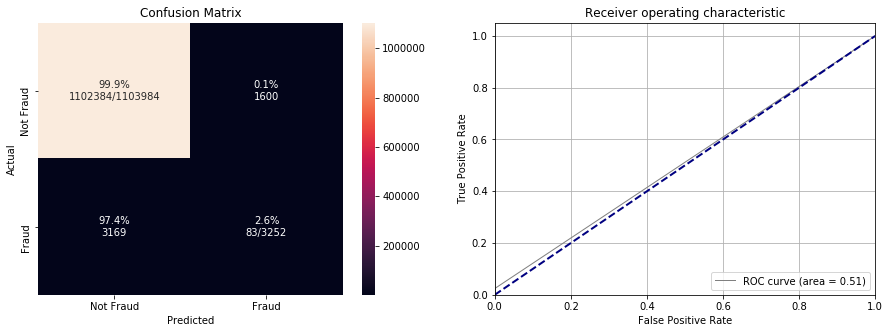

In [22]:
################################ Train and Test Models #############################
#################################    before tuning with PCA   #############################

RF_model = RandomForestClassifier()
runModel('Random Forest', RF_model, X_train_pca, Y_train, X_test_pca, Y_test)


==================== Random Forest ====================
--- Model Fitting in 347.0138695240021 seconds ---
--- Model Predicting in 9.124674558639526 seconds ---



Percent Accuracy: 99.064% 

Confusion Matrix : 
 [[1096589    7395]
 [   2966     286]] 

Classification Report : 
              precision    recall  f1-score   support

        0.0       1.00      0.99      1.00   1103984
        1.0       0.04      0.09      0.05      3252

avg / total       0.99      0.99      0.99   1107236
 

Area Under Curve : 
 0.5406237064071753 



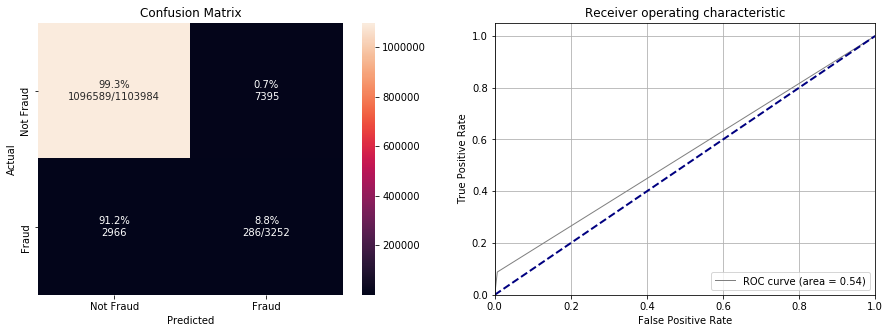

In [38]:
################################ Train and Test Models #############################
#################################    after tuning with PCA  #############################

RF_model = RandomForestClassifier(n_estimators=100,
                                  max_depth=30,
                                  min_samples_split=0.6,
                                  max_features=2
                                 )
runModel('Random Forest', RF_model, X_train_pca, Y_train, X_test_pca, Y_test)


In [3]:
######################################   LOAD unbalanced DATA without PCA:   ################################

X_train = np.genfromtxt('../../../data/x_train.csv', delimiter=',')
X_test = np.genfromtxt('../../../data/x_test.csv', delimiter=',')

Y_train=np.genfromtxt('../../../data/y_train.csv', delimiter=',')
Y_test=np.genfromtxt('../../../data/y_test.csv', delimiter=',')

==================== Random Forest ====================
--- Model Fitting in 59.6386399269104 seconds ---
--- Model Predicting in 1.2343289852142334 seconds ---



Percent Accuracy: 99.999% 

Confusion Matrix : 
 [[1103982       2]
 [     13    3239]] 

Classification Report : 
              precision    recall  f1-score   support

        0.0       1.00      1.00      1.00   1103984
        1.0       1.00      1.00      1.00      3252

avg / total       1.00      1.00      1.00   1107236
 

Area Under Curve : 
 0.998000324202071 



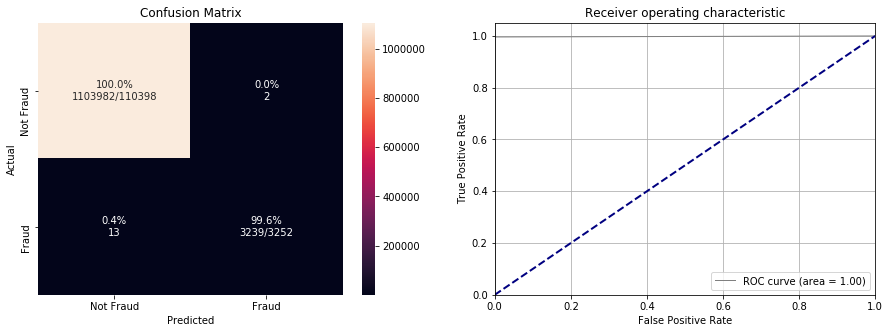

In [7]:
################################ Train and Test Models #############################
#################################    before tuning    #############################

RF_model = RandomForestClassifier()
runModel('Random Forest', RF_model, X_train, Y_train, X_test, Y_test)


==================== Random Forest ====================
--- Model Fitting in 100.73074150085449 seconds ---
--- Model Predicting in 5.984161615371704 seconds ---



Percent Accuracy: 99.706% 



C:\Users\souad\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion Matrix : 
 [[1103984       0]
 [   3252       0]] 

Classification Report : 
              precision    recall  f1-score   support

        0.0       1.00      1.00      1.00   1103984
        1.0       0.00      0.00      0.00      3252

avg / total       0.99      1.00      1.00   1107236
 

Area Under Curve : 
 0.5 



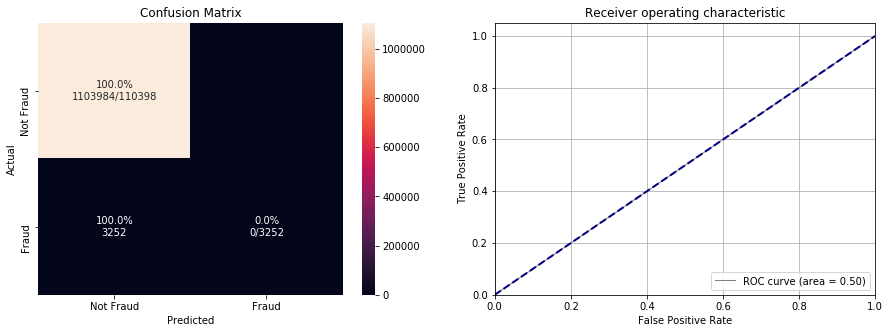

In [8]:
################################ Train and Test Models #############################
#################################    after tuning   #############################

RF_model = RandomForestClassifier(n_estimators=64,
                                  max_depth=8,
                                  min_samples_split=0.1,
                                  min_samples_leaf=0.1,
                                  max_features=2)
runModel('Random Forest', RF_model, X_train, Y_train, X_test, Y_test)
